# Setup

In [1]:
!nvidia-smi

Tue Apr 29 16:44:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

# Install YOLOv8

In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                39.1/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 1.26.4>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu124>=1.8.0
torch               ✅ 2.5.1+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu124>=0.9.0
tqdm                ✅ 4.67

# Train YOLO model

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Fc2gbaeaxXQcNi4deZho")
project = rf.workspace("workshop-yg2yt").project("expression-abyan")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 208MB/s]
Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Expression-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

# Confusion Matrix

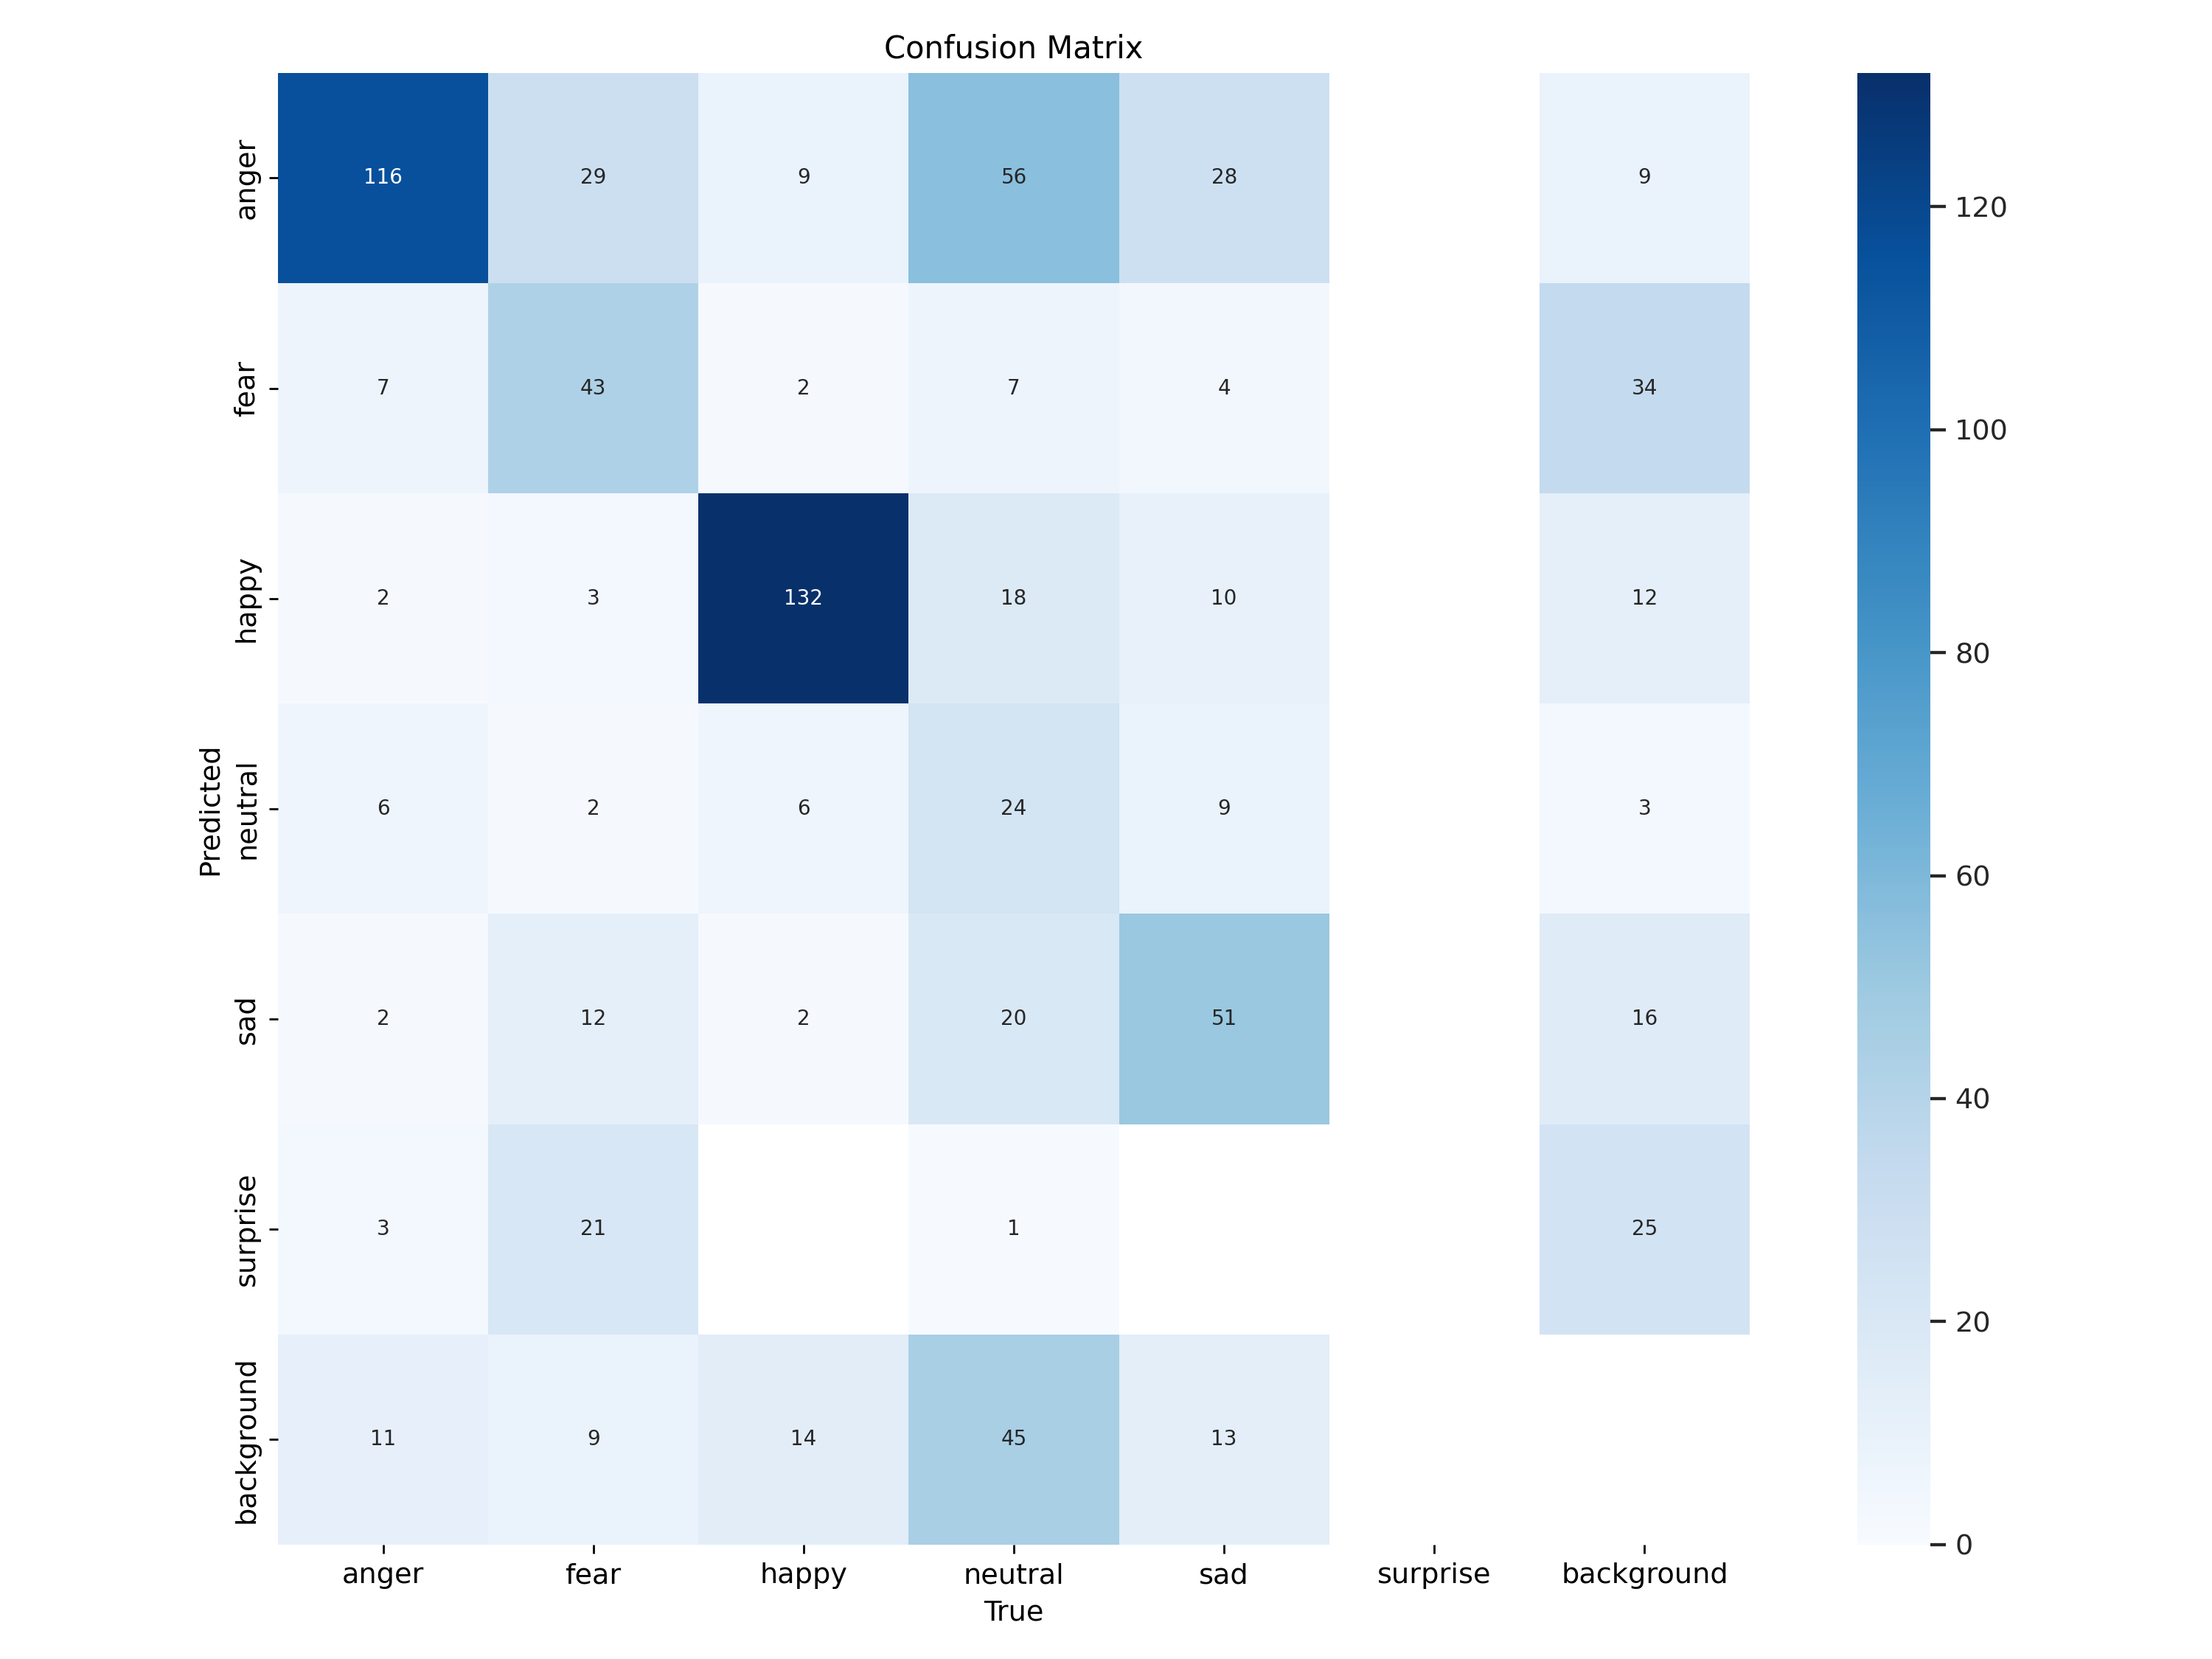

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

# Train Results

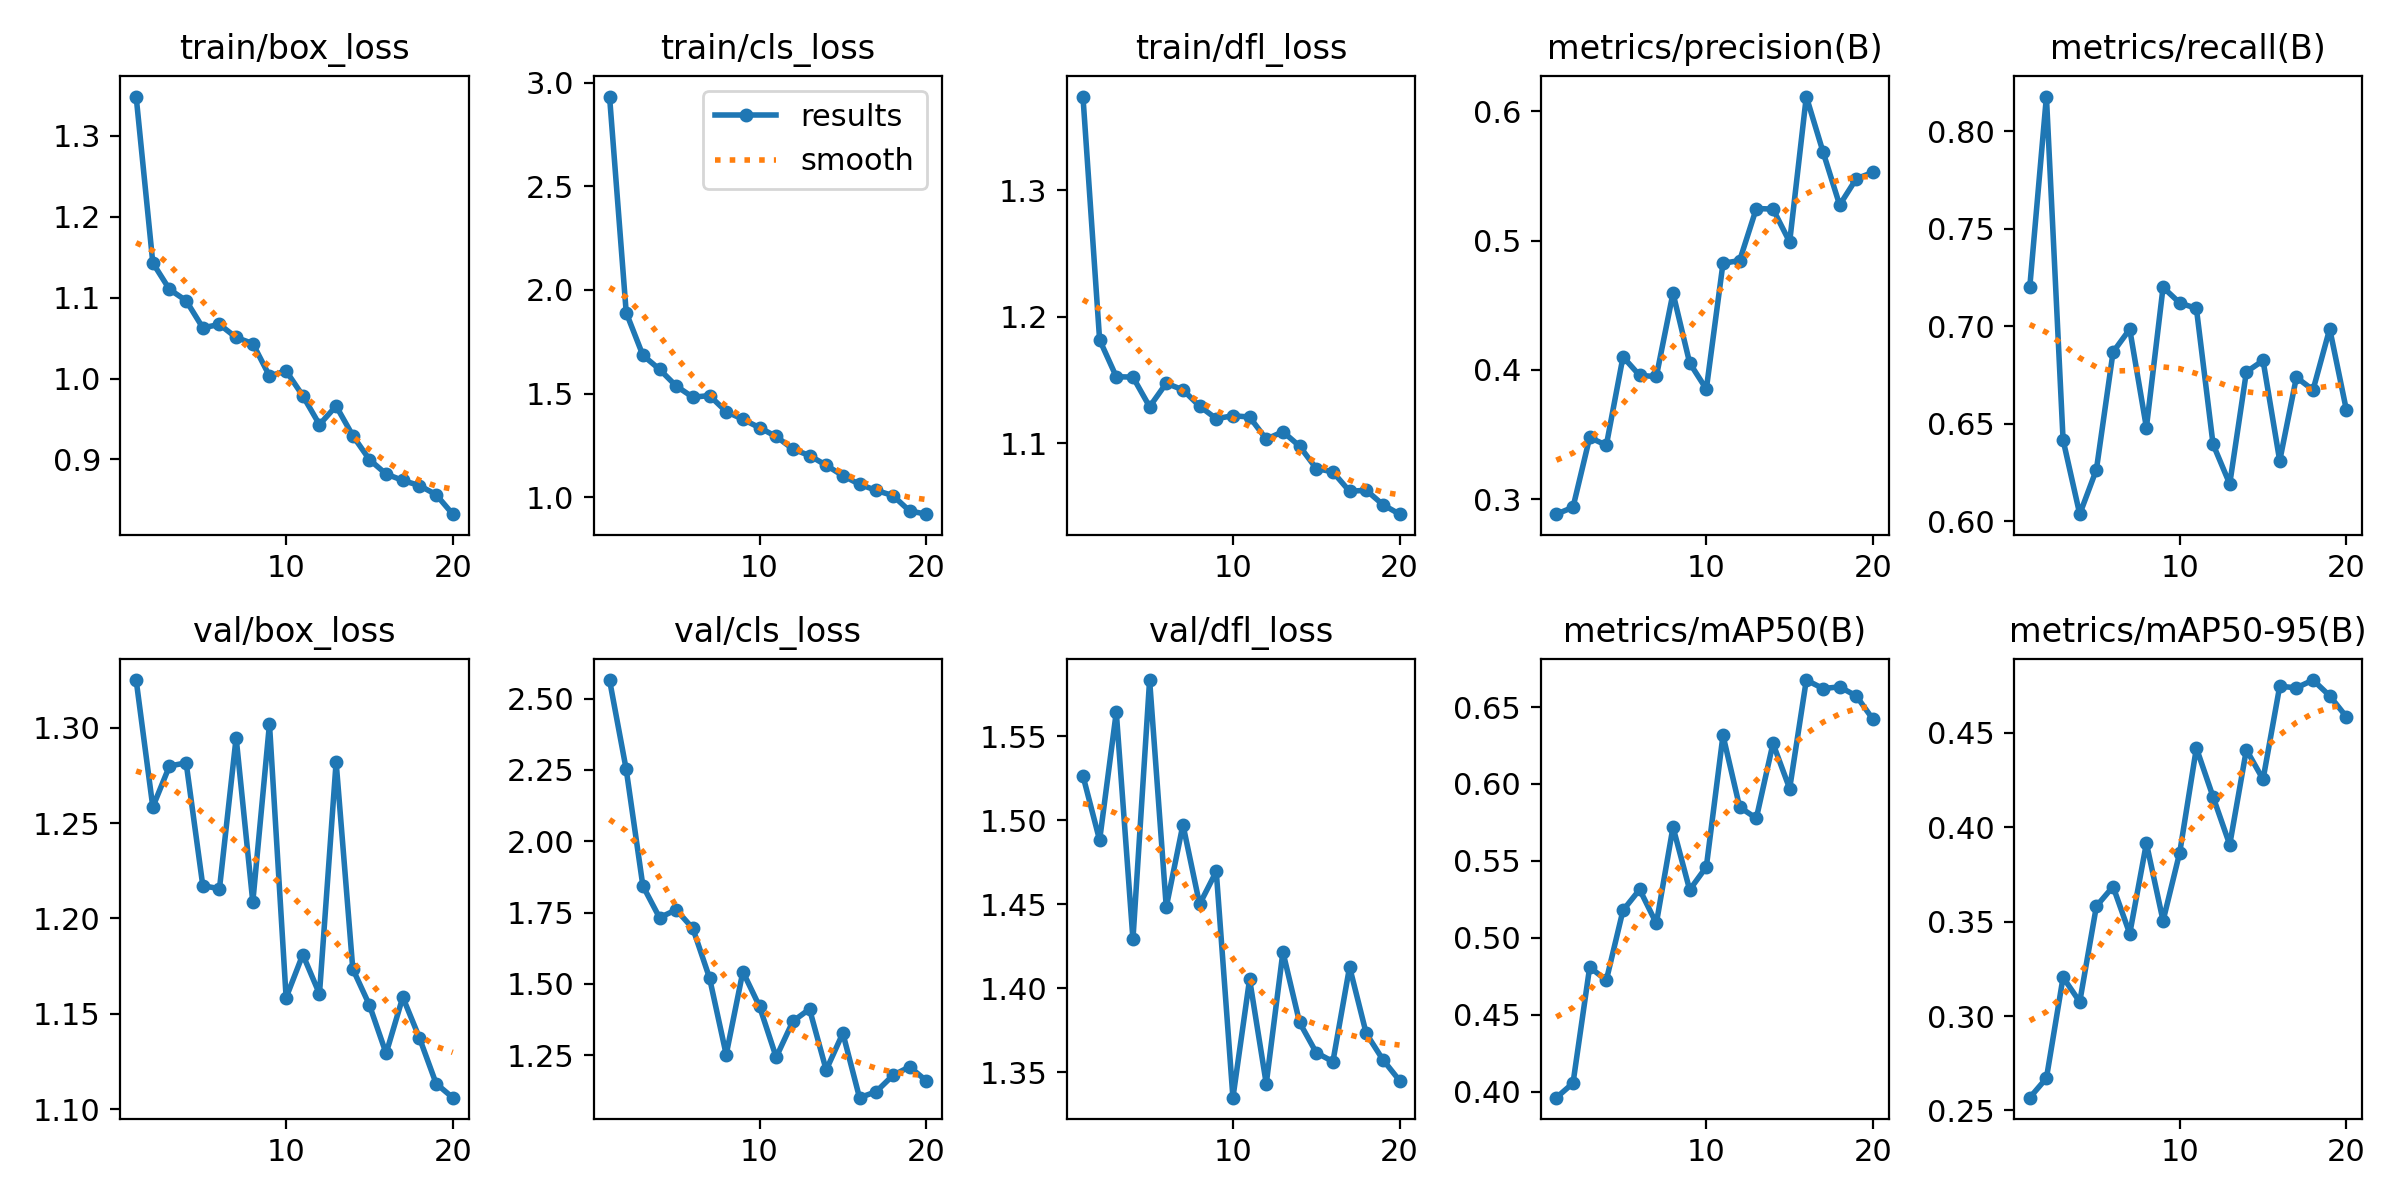

In [8]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

# Validation

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1044.8±525.7 MB/s, size: 44.4 KB)
val: Scanning /content/Expression-1/valid/labels.cache... 114 images, 0 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.35it/s]
                   all        114        717      0.524      0.669      0.663      0.478
                 anger         61        147      0.403      0.878      0.704      0.504
                  fear         54        119      0.585      0.687      0.671      0.491
                 happy         56        165      0.669       0.83       0.86      0.617
               neutral         42        171      0.526      0.368      0.503      0.364
                   sad         51        115       0.44 

# Testing

In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images

Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/54 /content/Expression-1/test/images/10_jpg.rf.ce22d89c4d1f72aee24d370b08fdeff2.jpg: 640x640 6 angers, 1 fear, 1 happy, 1 sad, 1 surprise, 16.2ms
image 2/54 /content/Expression-1/test/images/15_jpg.rf.6c4c59672b67d7faf28431cfd59789c4.jpg: 640x640 5 angers, 5 happys, 3 sads, 16.3ms
image 3/54 /content/Expression-1/test/images/1_jpg.rf.110100aa773069ceb22e8def1140ffc6.jpg: 640x640 7 angers, 1 fear, 2 happys, 2 sads, 16.2ms
image 4/54 /content/Expression-1/test/images/20_jpg.rf.94d55316b9cda8f1b10e5205dd825242.jpg: 640x640 5 angers, 4 happys, 2 sads, 16.2ms
image 5/54 /content/Expression-1/test/images/20_jpg.rf.c2d48ea666197886d873542014cfae56.jpg: 640x640 3 angers, 1 fear, 7 happys, 3 sads, 2 surprises, 16.2ms
image 6/54 /content/Expression-1/test/images/34_jpg.rf.467b0ada0a5ac2050e2d6a5e5fbf8b36.jpg: 640x640 3 anger

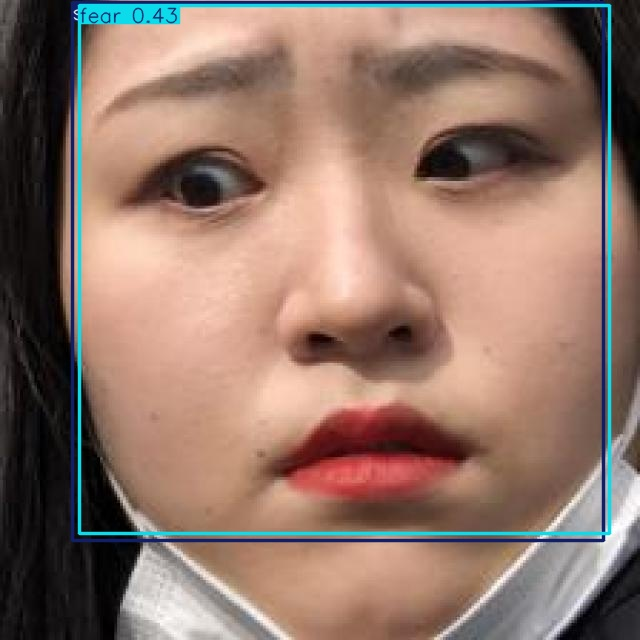

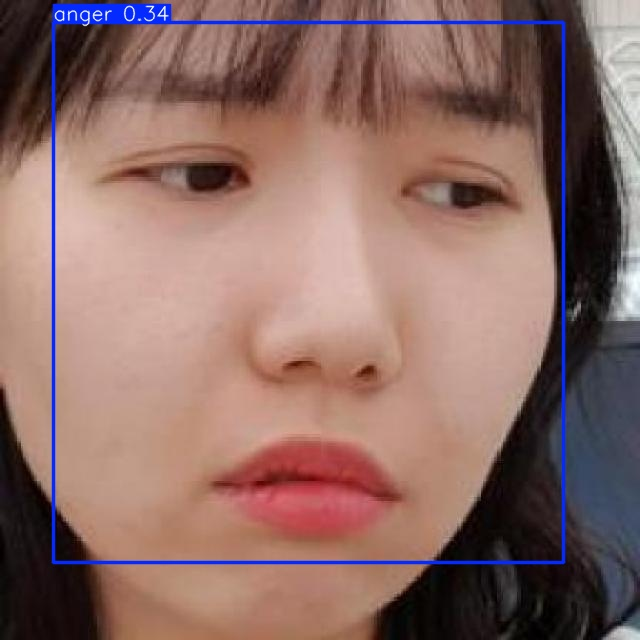

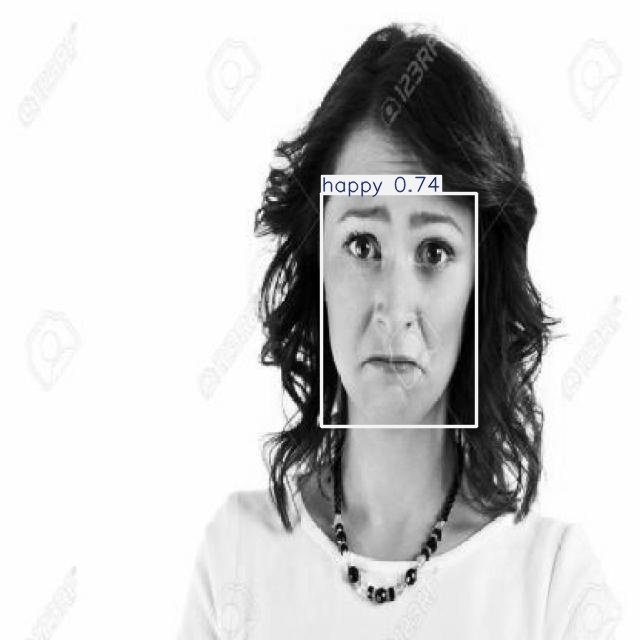

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=300))
      print("\n")